# Explore here

1.

In [47]:
import pandas as pd

df = pd.read_csv(r"https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [48]:
df.shape

(20640, 9)

In [49]:
df = df[['Latitude', 'Longitude', 'MedInc']]

In [50]:
df.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)


2.

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_train_scaled)

train_clusters = kmeans.labels_
test_clusters = kmeans.predict(X_test_scaled)

df.loc[X_train.index, 'cluster'] = train_clusters
df.loc[X_test.index, 'cluster'] = test_clusters

/tmp/ipykernel_802/917332121.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[X_train.index, 'cluster'] = train_clusters


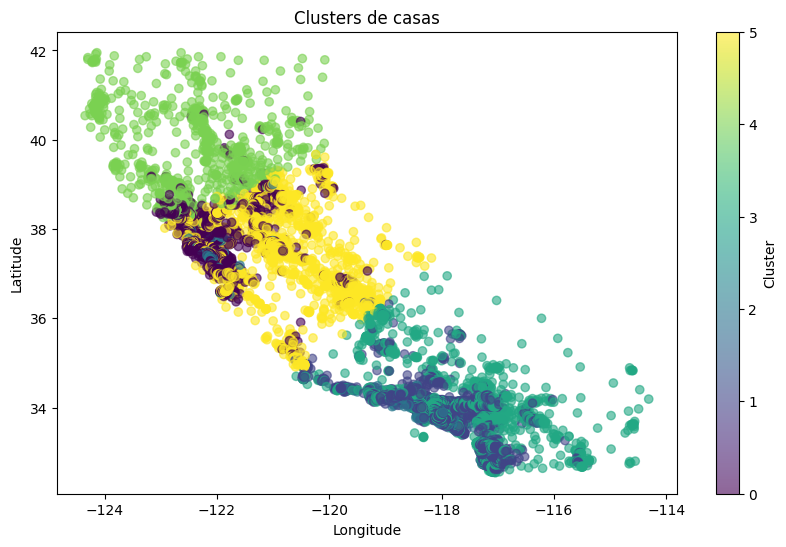

In [54]:
import matplotlib.pyplot as plt


# Visualización de los clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['cluster'], cmap='viridis', marker='o', alpha=0.6)
plt.title('Clusters de casas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()


A PESAR DEL NUMERO DE CLUSTERS ASIGNADO, LOS DATOS SE AGRUPAN MAYORITATIAMENTE EN 4.

In [55]:
df.head()

,Latitude,Longitude,MedInc,cluster
0,37.88,-122.23,8.3252,0.0
1,37.86,-122.22,8.3014,0.0
2,37.85,-122.24,7.2574,0.0
3,37.85,-122.25,5.6431,0.0
4,37.85,-122.25,3.8462,5.0


In [56]:
df.shape

(20640, 4)

In [57]:
df[['cluster']].groupby('cluster').value_counts()

cluster
0.0    3031
1.0    4451
2.0     599
3.0    6818
4.0    1228
5.0    4513
Name: count, dtype: int64

3.

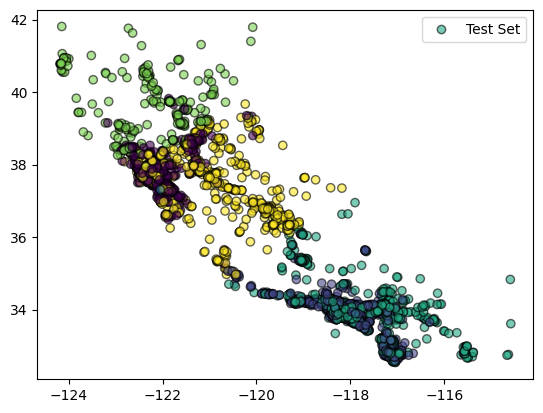

In [58]:
test_clusters_predicted = kmeans.predict(X_test_scaled)

# Agregar los puntos de prueba a la visualización existente
plt.scatter(X_test['Longitude'], X_test['Latitude'], c=test_clusters_predicted, cmap='viridis', marker='o', edgecolors='black', alpha=0.6, label='Test Set')

# Actualizar la leyenda
plt.legend()

# Mostrar la visualización actualizada
plt.show()

/tmp/ipykernel_802/1248332476.py:8: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test['Longitude'], X_test['Latitude'], c=test_clusters_predicted, cmap='viridis', marker='x', edgecolors='black', alpha=0.6, label='Test Set')


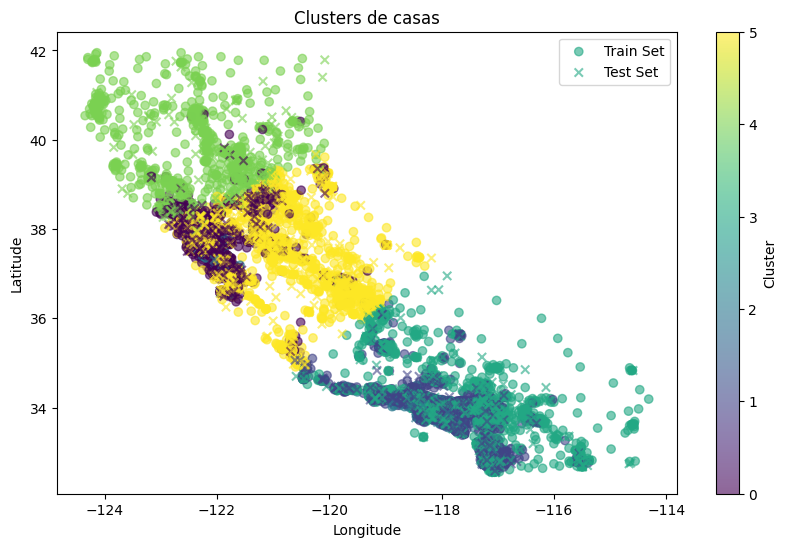

In [59]:
# Visualización de los clusters
plt.figure(figsize=(10, 6))

# Puntos del conjunto de entrenamiento
plt.scatter(X_train['Longitude'], X_train['Latitude'], c=train_clusters, cmap='viridis', marker='o', alpha=0.6, label='Train Set')

# Puntos del conjunto de prueba
plt.scatter(X_test['Longitude'], X_test['Latitude'], c=test_clusters_predicted, cmap='viridis', marker='x', edgecolors='black', alpha=0.6, label='Test Set')

# Configuración adicional del gráfico
plt.title('Clusters de casas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.legend()

# Mostrar la visualización con ambos conjuntos de datos
plt.show()


In [60]:
X = df.drop('cluster', axis=1)
y = df['cluster']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)
y_pred = model.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)


Accuracy: 0.937015503875969
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       557
         1.0       0.97      0.98      0.98       897
         2.0       0.99      0.93      0.96       116
         3.0       0.97      0.97      0.97      1397
         4.0       0.84      0.73      0.78       246
         5.0       0.87      0.90      0.88       915

    accuracy                           0.94      4128
   macro avg       0.93      0.91      0.92      4128
weighted avg       0.94      0.94      0.94      4128

